In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from src.california_housing import read_data
from src.california_housing import store_adjusted_data
from src.california_housing import preprocess_train

# Execute Pipeline and Load Data

#### Execute Preprocessing

In [2]:
# Process data train and test
store_adjusted_data.main()

Step 1 of 8: Successfully executed - stratified train and test set saved to: C:\Users\lukas\projects\machine_learning_examples\data\processed\california_housing\strat_train_set.csv
Step 2 of 8: Successfully executed - missing values imputed for training data
Step 3 of 8: Successfully executed - Isolation-Forest model saved successfully
Step 4 of 8: Successfully executed - outlier removed for training data
Step 5 of 8: Successfully executed - stratified processed train set saved to: C:\Users\lukas\projects\machine_learning_examples\data\processed\california_housing\strat_train_set_adjusted.csv
Step 6 of 8: Successfully executed - missing values imputed for test data
Step 7 of 8: Successfully executed - outlier removed for test data
Step 8 of 8: Successfully executed - stratified processed test set saved to: C:\Users\lukas\projects\machine_learning_examples\data\processed\california_housing\strat_test_set_adjusted.csv


#### Load Data

In [3]:
# Read train data
df_train = read_data.read_file(folder="california_housing",filename="strat_train_set_adjusted", csv=True)
# Read test data
df_test = read_data.read_file(folder="california_housing",filename="strat_test_set_adjusted", csv=True)

# Preprocess Data

In [5]:
# Create train variables
X_train = preprocess_train.data_preprocessing(df_train)
y_train = df_train[['median_house_value']].values.ravel()

In [6]:
# Create test variables
X_test = preprocess_train.data_preprocessing(df_test)
y_test = df_test[['median_house_value']].values.ravel()

# Get Random Forest Model and make Predictions

#### Get Model

In [7]:
# Get the best linear model
forest_reg = preprocess_train.train_random_forest_regressor(X=X_train, y=y_train)

Best Parameters:  {'max_features': 8, 'n_estimators': 30}


#### Make predictions

In [8]:
# Predict using the trained model
y_pred = forest_reg.predict(X_test)

In [9]:
# Compute Residuals
residuals = y_test - y_pred

In [10]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Print results
print(f'Mean Squared Error (MSE): {round(mse,0)}')
print(f'Root Mean Squared Error (RMSE): {round(rmse,0)}')
print(f'Mean Absolute Error (MAE): {round(mae,0)}')
print(f'R-squared (R2) Score: {round(r2,2)}')

Mean Squared Error (MSE): 3084521420.0
Root Mean Squared Error (RMSE): 55538.0
Mean Absolute Error (MAE): 42332.0
R-squared (R2) Score: 0.65


# Visualise Results

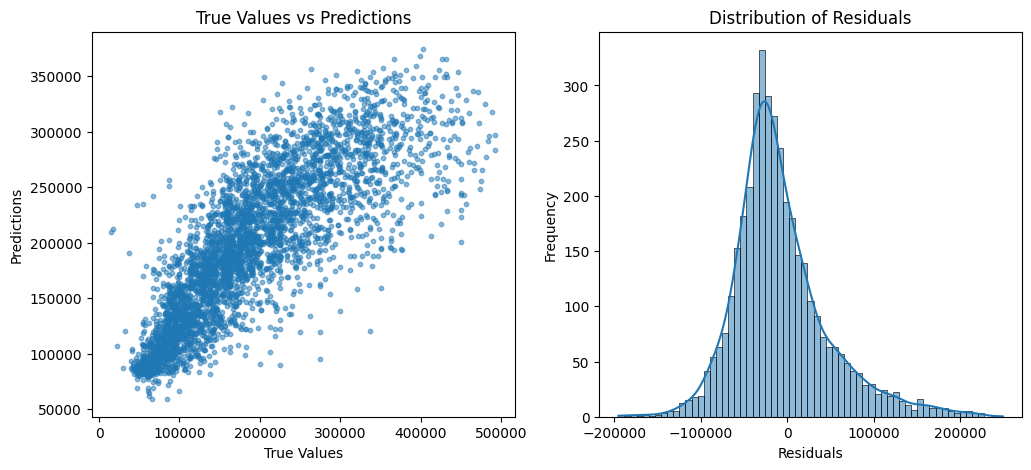

In [11]:
# Visualize results
plt.figure(figsize=(12, 5))

# Scatter plot of true vs predicted values
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, s=10)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')

# Residuals plot
plt.subplot(1, 2, 2)
# Distribution of residuals
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()